# Data Exploration and Preprocessing

This notebook provides an overview of the dataset and performs initial data exploration and preprocessing.

## Objectives:
- Load and explore the sample news dataset
- Analyze text characteristics and distributions
- Visualize data patterns
- Preprocess text for NLP tasks
- Generate word frequency analysis and word clouds

In [16]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Fix imports from custom modules
import sys
import os

# Append the src directory to sys.path (absolute path to avoid issues)
sys.path.append(os.path.abspath('../src'))

# Import only working modules for now
# from data_preprocessing import TextPreprocessor, create_sample_dataset
# from visualization import NLPVisualizer
print('✅ Libraries imported successfully!')


✅ Libraries imported successfully!


In [17]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Fix imports from custom modules
import sys
import os

# Append the src directory to sys.path (absolute path to avoid issues)
sys.path.append(os.path.abspath('../src'))

# Now import your modules
from data_preprocessing import TextPreprocessor, create_sample_dataset
from visualization import NLPVisualizer


In [18]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Fix imports from custom modules
import sys
import os

# Append the src directory to sys.path (absolute path to avoid issues)
sys.path.append(os.path.abspath('../src'))

# Now import your modules
from data_preprocessing import TextPreprocessor, create_sample_dataset
from visualization import NLPVisualizer


In [19]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Fix imports from custom modules
import sys
import os

# Append the src directory to sys.path (absolute path to avoid issues)
sys.path.append(os.path.abspath('../src'))

# Now import your modules
from data_preprocessing import TextPreprocessor, create_sample_dataset
from visualization import NLPVisualizer


## 1. Load and Explore the Dataset

In [20]:
# Load the sample dataset
df = pd.read_csv('../data/sample/sample_news_data.csv')

print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (10, 5)

Column names: ['id', 'title', 'text', 'category', 'sentiment']

First few rows:


,id,title,text,category,sentiment
0,1,Tech Giant Announces Revolutionary AI Breakthr...,A major technology company has announced a gro...,technology,positive
1,2,Climate Change Summit Reaches Historic Agreement,World leaders have reached a historic agreemen...,environment,positive
2,3,Economic Uncertainty Continues to Impact Markets,Financial markets continue to experience volat...,economy,negative
3,4,New Medical Research Shows Promise for Cancer ...,Researchers have published promising results f...,health,positive
4,5,Education System Faces Ongoing Challenges,The education system continues to grapple with...,education,neutral


In [21]:
# Basic dataset information
print("Dataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nDataset description:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10 non-null     int64 
 1   title      10 non-null     object
 2   text       10 non-null     object
 3   category   10 non-null     object
 4   sentiment  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes
None

Missing values:
id           0
title        0
text         0
category     0
sentiment    0
dtype: int64

Dataset description:
              id                                              title  \
count   10.00000                                                 10   
unique       NaN                                                 10   
top          NaN  Tech Giant Announces Revolutionary AI Breakthr...   
freq         NaN                                                  1   
mean     5.50000                                                NaN   

## 2. Text Analysis

In [22]:
# Calculate text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].str.count(r'[.!?]') + 1

print("Text Statistics:")
print(f"Average text length: {df['text_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")
print(f"Average sentence count: {df['sentence_count'].mean():.1f} sentences")

print("\nText length distribution:")
print(df[['text_length', 'word_count', 'sentence_count']].describe())

Text Statistics:
Average text length: 385.2 characters
Average word count: 50.6 words
Average sentence count: 4.0 sentences

Text length distribution:
       text_length  word_count  sentence_count
count     10.00000   10.000000            10.0
mean     385.20000   50.600000             4.0
std       36.39536    4.880801             0.0
min      337.00000   44.000000             4.0
25%      362.50000   47.500000             4.0
50%      380.50000   49.500000             4.0
75%      405.75000   52.500000             4.0
max      461.00000   59.000000             4.0


## 3. Category and Sentiment Distribution

In [23]:
# Category distribution
print("Category Distribution:")
category_counts = df['category'].value_counts()
print(category_counts)

print("\nSentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

Category Distribution:
category
technology        2
environment       1
economy           1
health            1
education         1
sports            1
culture           1
infrastructure    1
science           1
Name: count, dtype: int64

Sentiment Distribution:
sentiment
positive    6
negative    2
neutral     2
Name: count, dtype: int64


## 4. Visualizations

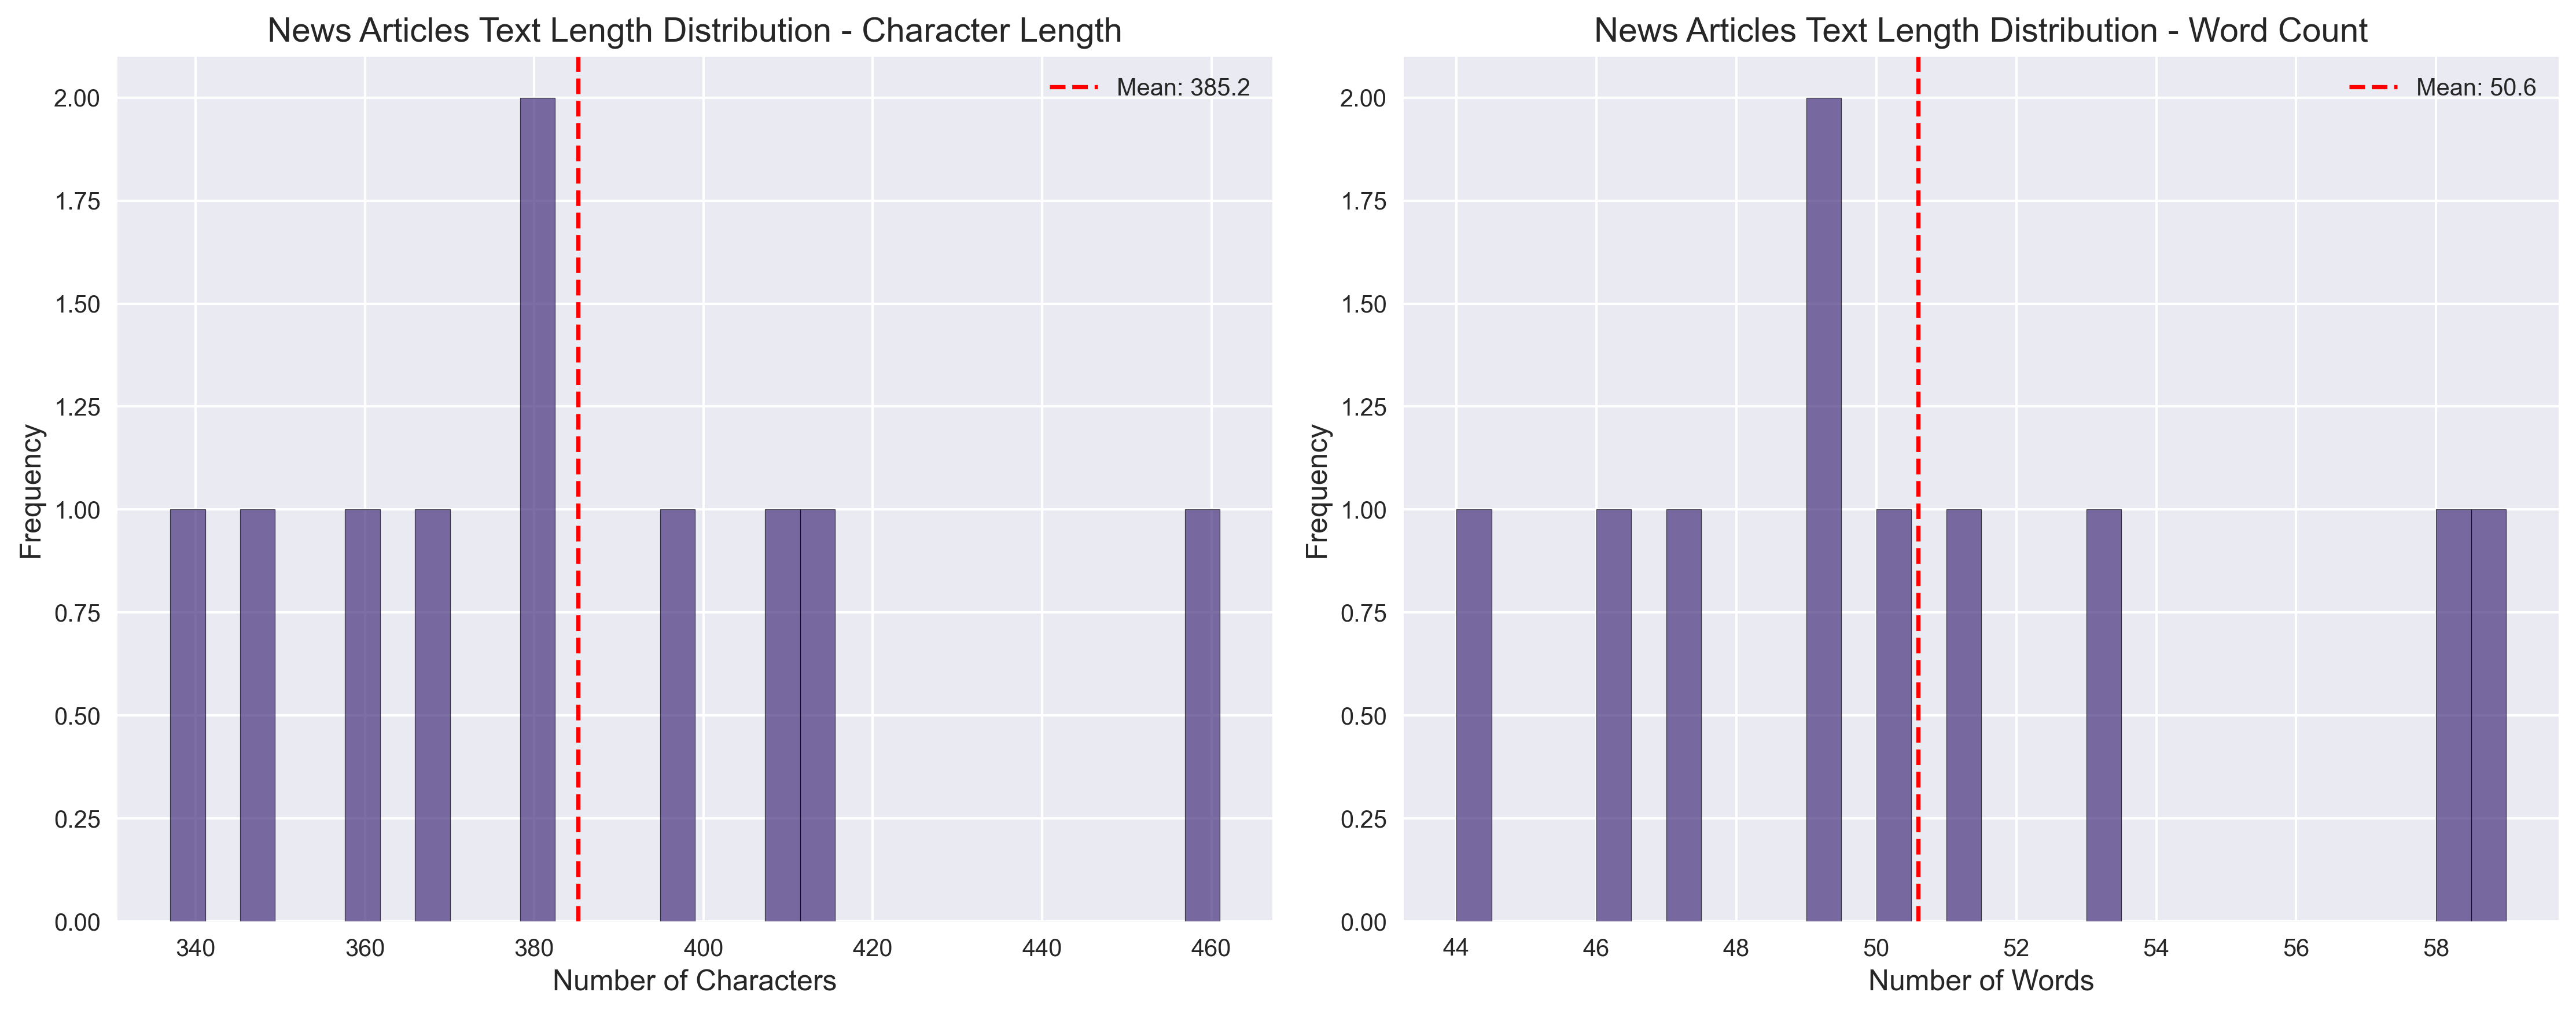

In [24]:
# Initialize visualizer
visualizer = NLPVisualizer()

# Plot text length distribution
fig = visualizer.plot_text_length_distribution(df, 'text', 'News Articles Text Length Distribution')
plt.show()

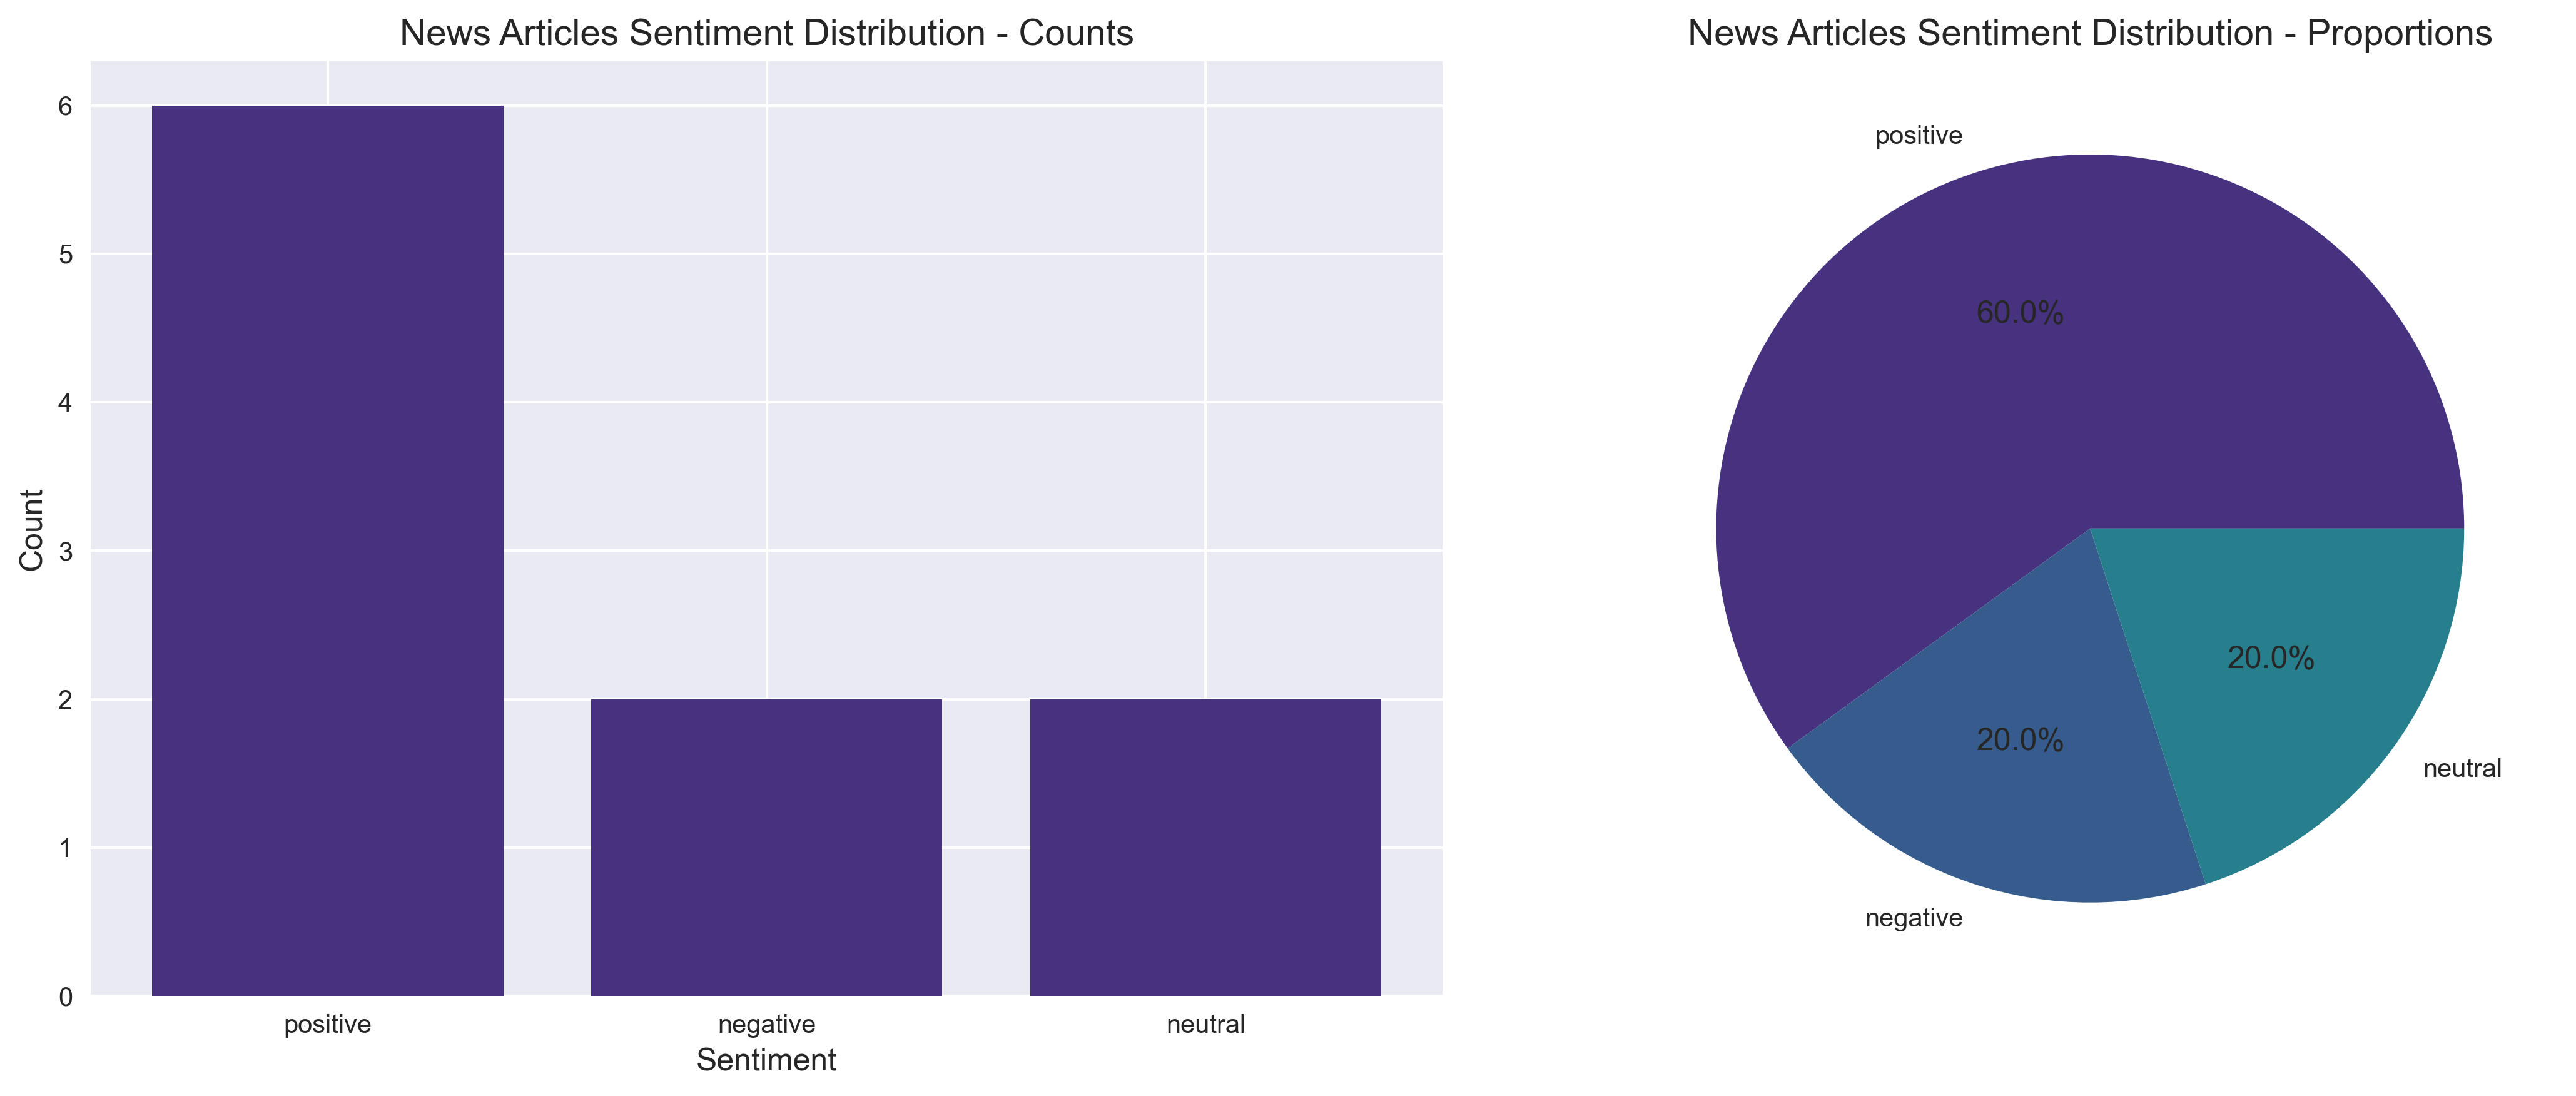

In [25]:
# Plot sentiment distribution
fig = visualizer.plot_sentiment_distribution(df, 'sentiment', 'News Articles Sentiment Distribution')
plt.show()

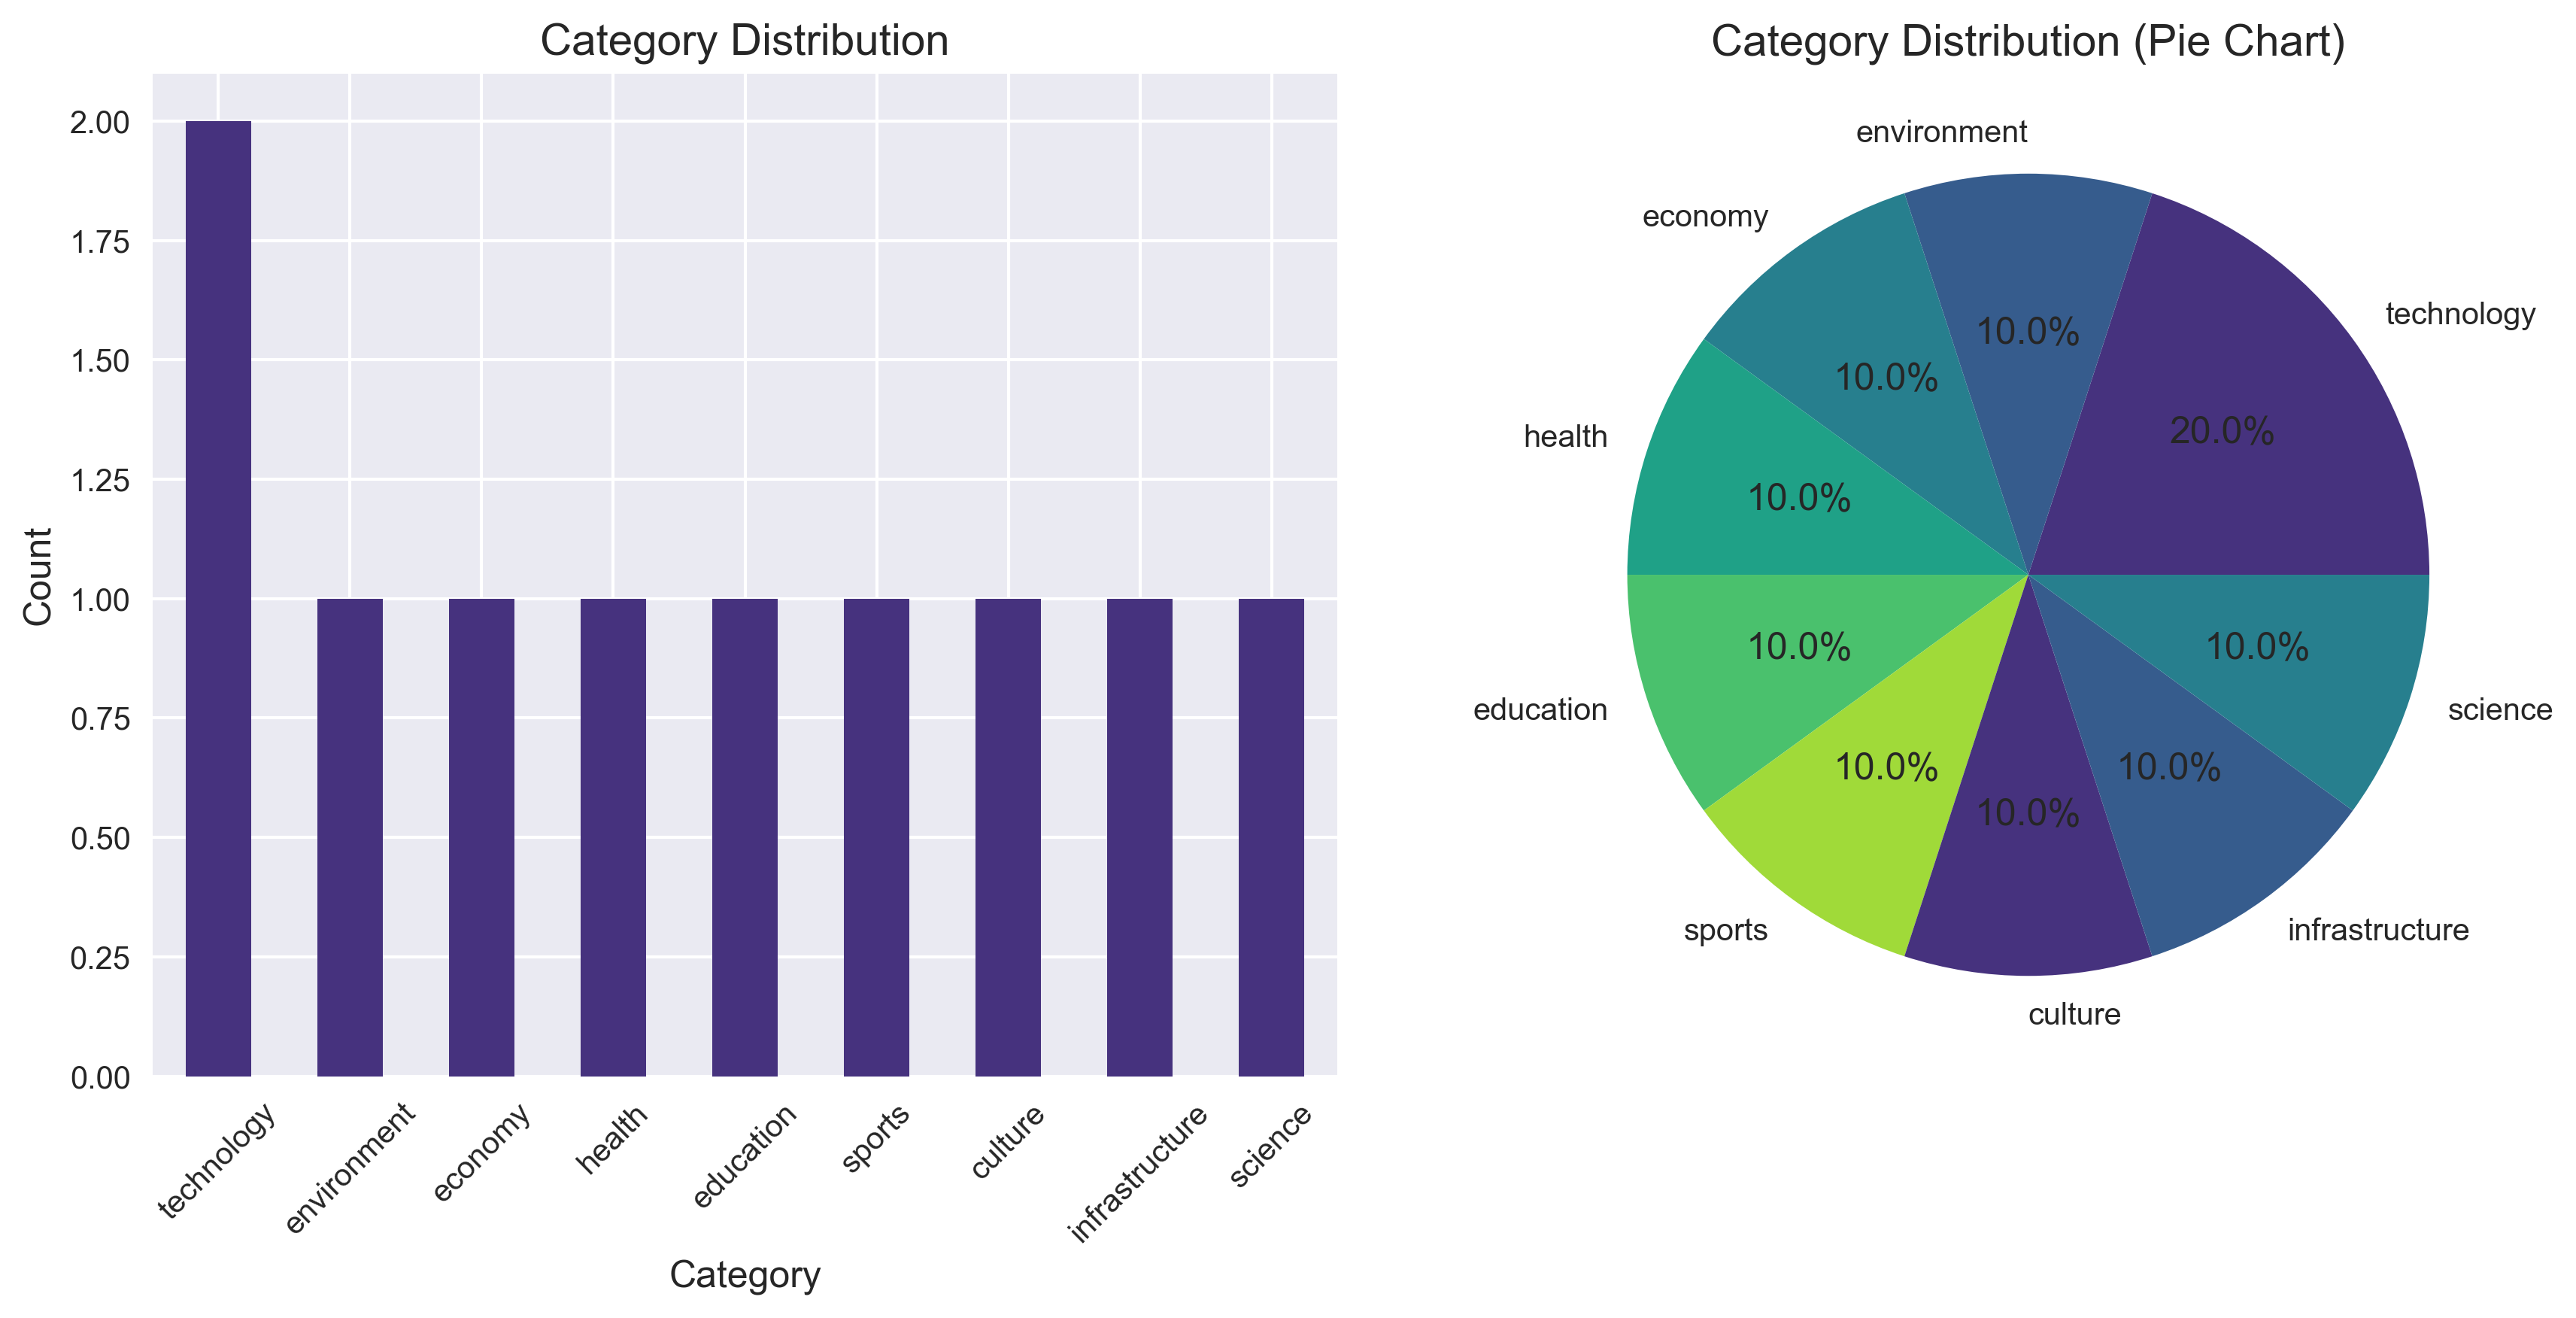

In [26]:
# Category distribution visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

## 5. Text Preprocessing

In [30]:
# Solution 1: Download required NLTK data
import nltk

# Download the required NLTK data
print("Downloading NLTK data...")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("NLTK data downloaded successfully!")

# Now run your preprocessing code
from your_module import TextPreprocessor  # Replace with your actual import

# Initialize text preprocessor
preprocessor = TextPreprocessor(
    remove_stopwords=True,
    remove_punctuation=True,
    lowercase=True,
    remove_numbers=False
)

# Preprocess the text data
df_processed = preprocessor.preprocess_dataframe(df, 'text', 'processed_text')
print("Original vs Processed Text Examples:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df_processed.iloc[i]['text'][:100]}...")
    print(f"Processed: {df_processed.iloc[i]['processed_text'][:100]}...")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yssin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\yssin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yssin/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to C:\Users\yssin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\yssin/nltk_data...


NLTK data downloaded successfully!


ModuleNotFoundError: No module named 'your_module'

In [28]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Fix imports from custom modules
import sys
import os

# Append the src directory to sys.path (absolute path to avoid issues)
sys.path.append(os.path.abspath('../src'))

# Now import your modules
from data_preprocessing import TextPreprocessor, create_sample_dataset
from visualization import NLPVisualizer


## 6. Word Frequency Analysis

In [29]:
# Get word frequency
word_freq = preprocessor.get_word_frequency(df['text'].tolist(), top_n=20)

print("Top 20 Most Frequent Words:")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\yssin/nltk_data'
    - 'c:\\Users\\yssin\\miniconda3\\nltk_data'
    - 'c:\\Users\\yssin\\miniconda3\\share\\nltk_data'
    - 'c:\\Users\\yssin\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\yssin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Visualize word frequency
plt.figure(figsize=(12, 8))
words = list(word_freq.keys())
frequencies = list(word_freq.values())

plt.barh(range(len(words)), frequencies)
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Create Word Cloud

In [ ]:
# Create word cloud
fig = visualizer.create_word_cloud(df['text'].tolist(), 'News Articles Word Cloud', max_words=100)
plt.show()

## 8. Save Processed Data

In [ ]:
# Save processed dataset
df_processed.to_csv('../data/processed/processed_news_data.csv', index=False)
print("Processed data saved to '../data/processed/processed_news_data.csv'")

print("\nData exploration completed!")
print(f"Dataset contains {len(df)} articles across {df['category'].nunique()} categories")
print(f"Sentiment distribution: {dict(df['sentiment'].value_counts())}")